In [1]:
# Copyright 2025 L3Harris Technologies, Inc.
#
#    Licensed under the Apache License, Version 2.0 (the "License");
#    you may not use this file except in compliance with the License.
#    You may obtain a copy of the License at
#
#        http://www.apache.org/licenses/LICENSE-2.0
#
#    Unless required by applicable law or agreed to in writing, software
#    distributed under the License is distributed on an "AS IS" BASIS,
#    WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
#    See the License for the specific language governing permissions and
#    limitations under the License.
#

In [2]:
import numpy as np 
import sympy

from copy import copy

import matplotlib.pyplot as plt

from pprint import pprint

In [3]:
# Table 15 in the manuscript.

Q = 27

# Weights
# F1 is symmetric if the weights are uniform... but they are not uniform.
w = np.zeros(Q,dtype=float)

# Vectors
c = np.zeros((Q,3), dtype=float)

w[0], c[0] = 1/216,      ( 1, 1, 1 )
w[1], c[1] = 1/216,      ( -1, 1, 1 )
w[2], c[2] = 1/54,       ( 0, 1, 1 )
w[3], c[3] = 1/216,      ( 1, -1, 1 )
w[4], c[4] = 1/216,      ( -1, -1, 1 )
w[5], c[5] = 1/54,       ( 0, -1, 1 )
w[6], c[6] = 1/54,       ( 1, 0, 1 )
w[7], c[7] = 1/54,       ( -1, 0, 1 )
w[8], c[8] = 2/27,       ( 0, 0, 1 )
w[9], c[9] = 1/216,      ( 1, 1, -1 )
w[10], c[10] = 1/216,    ( -1, 1, -1 )
w[11], c[11] = 1/54,     ( 0, 1, -1 )
w[12], c[12] = 1/216,    ( 1, -1, -1 )
w[13], c[13] = 1/216,    ( -1, -1, -1 )
w[14], c[14] = 1/54,     ( 0, -1, -1 )
w[15], c[15] = 1/54,     ( 1, 0, -1 )
w[16], c[16] = 1/54,     ( -1, 0, -1 )
w[17], c[17] = 2/27,     ( 0, 0, -1 )
w[18], c[18] = 1/54,     ( 1, 1, 0 )
w[19], c[19] = 1/54,     ( -1, 1, 0 )
w[20], c[20] = 2/27,     ( 0, 1, 0 )
w[21], c[21] = 1/54,     ( 1, -1, 0 )
w[22], c[22] = 1/54,     ( -1, -1, 0 )
w[23], c[23] = 2/27,     ( 0, -1, 0 )
w[24], c[24] = 2/27,     ( 1, 0, 0 )
w[25], c[25] = 2/27,     ( -1, 0, 0 )
w[26], c[26] = 8/27,     ( 0, 0, 0 )

print(f"number of velocity vectors: {len(c)}")


number of velocity vectors: 27


In [4]:
u = sympy.Symbol("u")
u_vec = np.array([u,0,0])
print(u_vec)

feq = np.array(np.zeros(Q), dtype=object)
for i in range(Q):
    # equation 12b:
    # assume \rho = 1
    feq[i] = 1.0
    feq[i] += (3.0)*np.inner(u_vec,c[i])
    feq[i] += (9.0/2)*(np.inner(u_vec,c[i]))**2
    feq[i] += (-3.0/2)*np.inner(u_vec,u_vec)
    feq[i] *= w[i]
    # print(f"{i}: {feq[i]}")

print(f"length of feq is {len(feq)}")

[u 0 0]
length of feq is 27


In [5]:
Re_idx = 0
u_idx = 1
delta_t_idx = 2
delta_x_idx = 3
L = 1.0
nu = 0.000001003

print(f"\nProblem instances table 8 (sphere instances):")
problem_instances = [
    [1e1, 0.000010030e0, 332.33632e0,  0.1e0],
    [1e2, 0.000010030e1, 332.33632e-2, 0.1e-1],
    [1e3, 0.000010030e2, 332.33632e-4, 0.1e-2],
    [1e4, 0.000010030e3, 332.33632e-6, 0.1e-3],
    [1e5, 0.000010030e4, 332.33632e-8, 0.1e-4],
    [1e6, 0.000010030e5, 332.33632e-10, 0.1e-5],
    [1e7, 0.000010030e6, 332.33632e-12, 0.1e-6],
    [1e8, 0.000010030e7, 332.33632e-14, 0.1e-7]
]
for p in problem_instances:
    print(p)

print("\nnote that velocity in lattice units is the same for all problem instances:")
for p in problem_instances:
    Re = p[Re_idx]
    u_val = p[u_idx]
    delta_t = p[delta_t_idx]
    delta_x = p[delta_x_idx]
    print(f"Re={Re},\tu_lattice_units = {u_val*delta_t/delta_x}")


Problem instances table 8 (sphere instances):
[10.0, 1.003e-05, 332.33632, 0.1]
[100.0, 0.0001003, 3.3233632, 0.01]
[1000.0, 0.001003, 0.033233632, 0.001]
[10000.0, 0.01003, 0.00033233632, 0.0001]
[100000.0, 0.1003, 3.3233632e-06, 1e-05]
[1000000.0, 1.003, 3.3233632e-08, 1e-06]
[10000000.0, 10.03, 3.3233632e-10, 1e-07]
[100000000.0, 100.3, 3.3233632e-12, 1e-08]

note that velocity in lattice units is the same for all problem instances:
Re=10.0,	u_lattice_units = 0.033333332896
Re=100.0,	u_lattice_units = 0.033333332896000004
Re=1000.0,	u_lattice_units = 0.033333332896
Re=10000.0,	u_lattice_units = 0.033333332896000004
Re=100000.0,	u_lattice_units = 0.033333332896
Re=1000000.0,	u_lattice_units = 0.033333332896000004
Re=10000000.0,	u_lattice_units = 0.033333332896000004
Re=100000000.0,	u_lattice_units = 0.033333332896


0	feq[0]=0.005108024684879012
1	feq[1]=0.0041820987711012345
2	feq[2]=0.01848765432179753
3	feq[3]=0.005108024684879012
4	feq[4]=0.0041820987711012345
5	feq[5]=0.01848765432179753
6	feq[6]=0.02043209873951605
7	feq[7]=0.016728395084404938
8	feq[8]=0.07395061728719012
9	feq[9]=0.005108024684879012
10	feq[10]=0.0041820987711012345
11	feq[11]=0.01848765432179753
12	feq[12]=0.005108024684879012
13	feq[13]=0.0041820987711012345
14	feq[14]=0.01848765432179753
15	feq[15]=0.02043209873951605
16	feq[16]=0.016728395084404938
17	feq[17]=0.07395061728719012
18	feq[18]=0.02043209873951605
19	feq[19]=0.016728395084404938
20	feq[20]=0.07395061728719012
21	feq[21]=0.02043209873951605
22	feq[22]=0.016728395084404938
23	feq[23]=0.07395061728719012
24	feq[24]=0.0817283949580642
25	feq[25]=0.06691358033761975
26	feq[26]=0.29580246914876046


<StemContainer object of 3 artists>

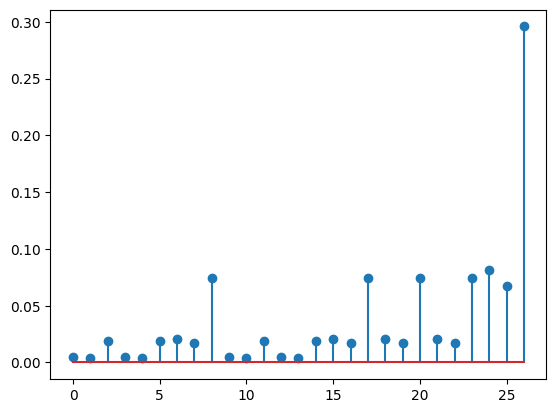

In [6]:
u_val_lattice_units = 0.033333332896

feq_val = np.zeros(Q)
for i in range(Q):
    feq_val[i] = feq[i].evalf(subs={u:u_val_lattice_units})
    # print(f"{i}\tfeq[{i}]={feq[i]}\t\t={feq_val[i]}")
    print(f"{i}\tfeq[{i}]={feq_val[i]}")
    
plt.stem(feq_val)

In [7]:
# Verify: Reconstruct the flow vector from the individual lattice populations.  It should be [u, 0, 0]. 

u_reconstructed = np.zeros(3)
for i in range(Q):
    u_reconstructed += feq_val[i]*c[i]

print(f"after rounding off numerical issues...")
u_reconstructed[u_reconstructed < 1e-14] = 0
print(f"u = [{u_reconstructed}]")

after rounding off numerical issues...
u = [[0.03333333 0.         0.        ]]


Note that $\phi = f^{\otimes 1} \bigoplus f^{\otimes 2} \bigoplus f^{\otimes 3}$.  We have calculated $\| f_0 \|_\infty$, but we need to find $\| \phi_0 \|_\infty$.  (It turns out to be the same as $\| f_0 \|_\infty$).

phi0_norm = 0.29580246914876046


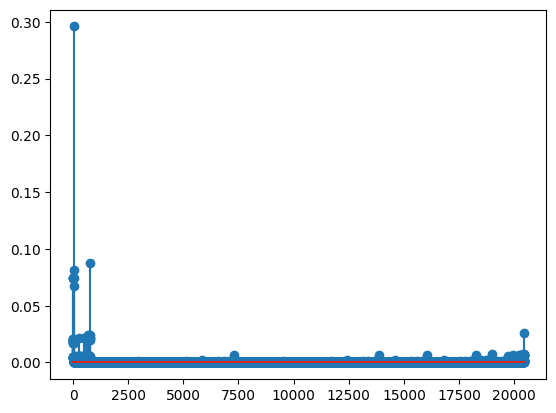

In [8]:
phi0 = copy(feq_val)
phi0 = np.concatenate((phi0, np.kron(feq_val, feq_val)))
phi0 = np.concatenate((phi0, np.kron(feq_val, np.kron(feq_val, feq_val))))

plt.stem(phi0)

phi0_norm = np.linalg.norm(phi0, ord=np.inf)
print(f"phi0_norm = {phi0_norm}")
